In [1]:
# How to improve accuracy?
#1) Select proper ML model  2) Hyper parameteer tunning  3) Prepare data (Data cleaning/ Feature Engineering)

In [2]:
# Steps of Feature Engineering:-
#1) Imputation/ Missing data handling  2) Encoding/Convert text data into numeric 3) Scaling/ Bring alldata on same scale
# 4) Feature creatinon/ Create new colms from given data 5)Feature Selection/ select required colms for ML model creation
# 6) Feature reduction/ Reduce no of colms without losing much data (Eigen value/vector)

# Missing Data Handling

In [3]:
# Missing data Handling :- In dataframe missing data is reperesented by 'Nan'
# Steps :- 1) Delete rows/colms:- If data is missing in only few rows then those rows can be deleted
# Generally, colms cannot be deleted but if colm contains only few rows of data, then we can delete colms
# df.dropna():- Used to delete rows(axis =0), or colms (axis =1) which contains na values

In [4]:
#Fill missing data:- df['colm name'].fill_na(Value to be filled)- Used to fill the missing data by a value. Used for series
#1) Constant:- missing data can be replaced by any constant no
#2) Mean:- It is nothing but average of all available data pt values  Used where outlier are not present
#3) Median:- If data is arranged in sorted manner then middle value reperesents 'Median' For odd no of data pts- middle val
# for event no of data pts- avg of middle 2 val. Generally used for filling data. It doesnot get affected by outliers
# 4) Mode:- It is most frequently occuring value in given data. Generally, used for filling the text data

# Feature Encoding

In [5]:
# In this, we convert categorical data into numeric data. Such  categorical data reduces accuracy of ML model
# eg. names of city, y colm of classification('Purchased')

In [6]:
# 1) One_Hot Encoding:-Used for nominal variables    Here, we craete separate colm for every category in the given colm.
# eg. if given colm contains names of city, then in this, it creates separate colm for every city name & all rows of (0 &1)
# Here, we donot lose any information. but no. of colms in o/p table increase which increases the complexity of ML model
# It is used for nominal data, where all categorical values are equal, & no relation in between them
# pd.get_dummies(df['colm name']) => returns the dataframe of all req. colms, if drop_first = True, then we get (n-1) colms
# from sklearn.preprocessing import OneHotEncoder

In [8]:
#2) Label Encoding:- Used for ordinal variable. Here, we assign a unique for every category of data in given colm
# eg. If a given colm contains Grades(A+,A,B+,B,C,F) of students, then we can assign values(5,4,3,2,1,0) for every grade
# Here, we convert 1 colm of given data into 1 colm of numeric data. but it may misunderstood the data (Nashik>Mumbai>Pune)
# Here, we have to use proper scaled label to categories otherwise we may lose the information
# eg Grades=> (A+,A,B+,B,C,F) = (5,4,3,2,1,0) (not good as here A=2*B),  (A+,A,B+,B,C,F) = (10,9,8,7,6,4) (Better as A=!B)
# create d1 ={'A':3,'B':2,'C':1,'F':0} then use df['new'] = df['grade'].map(d1) or use sklearn.preprocessing=> LabelEncoder

In [9]:
# Target Encoder(Label encoding):- It uses the value of probability of given colm with o/p (y) colm foe encoding
# eg. In play golf, in Temp colm, low - 40 days, high - 50 days, & golf played on low- 20 days & high- 30 days, then 
#we can use (20/40 =0.5) for low (ie. p(low)) and (30/50 =0.6) for high (ie. p(high)) values for encoding (irresp of order)

# Feature selection

In [10]:
# Here, we select the colms which affect the o/p ie. colms of 'X', which affect on 'y'
# It can be done by domain knowledge (remove colms like roll no, cust_id) and co-relation

In [12]:
# UNIVARIATE ANALYSIS:- Can be found out for single column (Property of single column)
# Variance:- It tells us, how much data points are away from mean value of colm. Reln between every value with its own colm
# Var:-Difference between every value & mean of colm. Var =sum of ((Xi - mean(X0))^2)/(n-1) Value varies between (-1 to +1)
# Sandard Deviation(sigma):- Square root of variance of colm.   More normalized value   No definite value

In [15]:
# BIVARIATE ANALYSIS:- Can be found out the relation between 2 colms
#Co-variance:- It tells us, how much the value of colm 2 changes with change in value of colm 1
# Co-variance = sum of((Xi0 - mean(X0))*(Xi1 - mean(X1)))/(n-1)  Its value has no fixed domain, it can be from o to any no.
# Co-variance of any colm with itself = Variance of that column
# Co0Relation:- It gives the relation between 2 colms that how much the 2 colms are affecting each other
# Co-Relation = (Covariance between (X0, X1))/(std. Dev(X0) * Std. Dev(X1)).   Its value varies between (-1 to +1)
# Co-Rel = -1 :- Two colms are exactly co-related but iversaly proportional (X0 increases, X1 decreases and vice versa)
# Co-Rel = 0 :- Two colms are not co-related with each other    (change in X0, doesnot affect change X1)
# Co-Rel = +1 :- Two colms are exactly co-related but directly proportional   (X0 increases, X1 increases and vice versa)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
x0 = np.random.randint(0,20,20)
x1 = x0*0.3

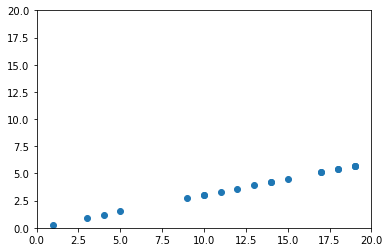

In [19]:
plt.xlim([0,20])
plt.ylim([0,20])
plt.scatter(x0, x1)

In [20]:
np.corrcoef(x0,x1) #Used to find out co-relation between 2 colms Gives o/p as confusion matrix(Co-relation matrix), +ve CoR

array([[1., 1.],
       [1., 1.]])

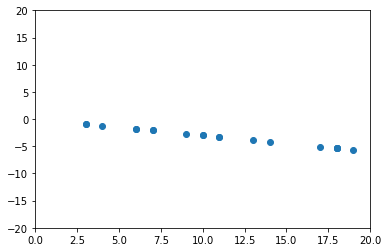

In [21]:
x0 = np.random.randint(0,20,20)
x1 = -x0*0.3
plt.xlim([0,20])
plt.ylim([-20,20])
plt.scatter(x0, x1)

In [23]:
np.corrcoef(x0,x1)  # give value as co-relation between (X0,X0, X0,X1, X1,X0, X1,X1)   -ve co-relation

array([[ 1., -1.],
       [-1.,  1.]])

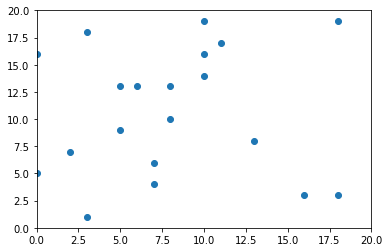

In [24]:
x0 = np.random.randint(0,20,20)
x1 = np.random.randint(0,20,20)
plt.xlim([0,20])
plt.ylim([0,20])
plt.scatter(x0, x1)

In [27]:
np.corrcoef(x0,x1)   # Least co-relation between X0, X1, (nearly = 0), ie. no co-rrelation

array([[1.        , 0.04355716],
       [0.04355716, 1.        ]])

# Feature Creation

In [2]:
# In this, features (Columns) are created on the basis of analysis and requirement of ML model to predict 'y'
# eg. In diabetic analysis, X contains, height, weight and Age, but on the basis of it, we can create 'BMI' index,
# which is more relavent for diabetic pateint detection. So, creation of such feature(colm) on basis of given data is 'FC'